<a href="https://colab.research.google.com/github/maberf/colabs/blob/main/DerivativosEx2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#CURSO MASTERS 2024-02
# Disciplina: DERIVATIVOS
# Professor: ANDRE MAIALY
# Exercício: ATIVIDADE 2 A - Simulações de Mote Carlo - Regressão à Média
# Alunos(s): MABER FERNANDES, LUCAS CORREA, PRISCILLA CARVALHO

In [23]:
# importação dos pacotes
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random

In [24]:
# inputs - variáveis e valores
to = 0
ro = 0.15 # valor inicial do underlying
k = 1.5 # multiplicador de aceleração de regressão
req = 0.40 # valor de regressão à média
sigma = 0.40 # valor da volatilidade em numérico de %
alpha = 1.0 # valor do alpha para ajuste do correlação no modelo
t = 1 # período em anos

In [25]:
# parâmetros adicionais para a simulação do exercício
dt = 1/252 # base dia para ano base 252
flows = 80 # quantidade de fluxos
#
data = {'N': range(t*(252+1))} # 1 incremento a mais para fechar em ano(s)

In [26]:
# criação do dataframe
df = pd.DataFrame(data)
# carregamento da coluna com os incrementos de tempo
df['t'] = df['N'] * dt
# print(df)

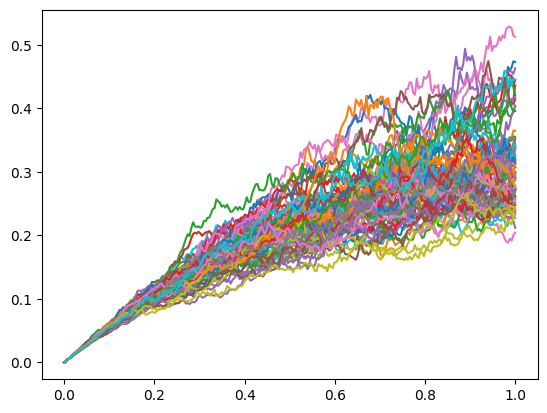

In [27]:
# recorrências aninhadas, fluxos, cálculos no dataframe e plotagem dos fluxos
# fluxos
for r in range(0, flows):
    flow = 'R'+str(r)
    df[flow] = to
    df[flow] = df['R'+str(r)].astype(float)
    # recorrência do cálculo no dataframe
    for i in range(1, len(df)):
        rt = df.iloc[i - 1, r+2]
        df.iloc[i, r+2] = rt+k*(req-rt)*dt+sigma*rt**(alpha)*stats.norm.ppf(random.random(), loc=0, scale=math.sqrt(dt))
    # plotagem dos fluxos
    plt.plot(df['t'], df[flow], label=flow)
# acréscimo de legendas no gráfico
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
# print(df)

(array([ 2.,  4.,  7.,  6., 13.,  8.,  7., 10.,  6.,  3.,  1.,  0.,  3.,
         3.,  1.,  3.,  1.,  1.,  0.,  1.]),
 array([0.20429027, 0.21968567, 0.23508106, 0.25047645, 0.26587184,
        0.28126724, 0.29666263, 0.31205802, 0.32745341, 0.34284881,
        0.3582442 , 0.37363959, 0.38903498, 0.40443037, 0.41982577,
        0.43522116, 0.45061655, 0.46601194, 0.48140734, 0.49680273,
        0.51219812]),
 <BarContainer object of 20 artists>)

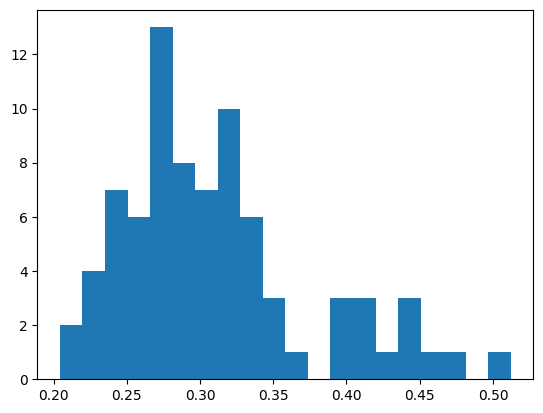

In [28]:
#plotagem histograma t = T
lastrow = t*252
plt.hist(df.iloc[lastrow, 2:], bins=20)